# **<center>Bank Customers Churn Prediction</center>**

**Importing necessary libraries**

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### **DATA INGESTION**

**Reading the dataset**

In [16]:
df = pd.read_csv('../data/Churn_Modelling.csv')

### **EDA**

**Display Top 5 Rows of The Dataset**

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check Last 5 Rows of The Dataset**

In [18]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [19]:
print(df.shape)
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

(10000, 14)
Number of Rows 10000
Number of Columns 14


**Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Check Null Values In The Dataset**

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Get Overall Statistics About The Dataset**

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


### **DATA TRANSFORMATION**

**Dropping Irrelevant Features**

In [23]:
print(df.columns)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df.head()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Encoding Categorical Data**

In [24]:
print(df['Geography'].unique())
df = pd.get_dummies(df,drop_first=True)
df.head()

['France' 'Spain' 'Germany']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


**Not Handling Imbalanced**

Exited
0    7963
1    2037
Name: count, dtype: int64


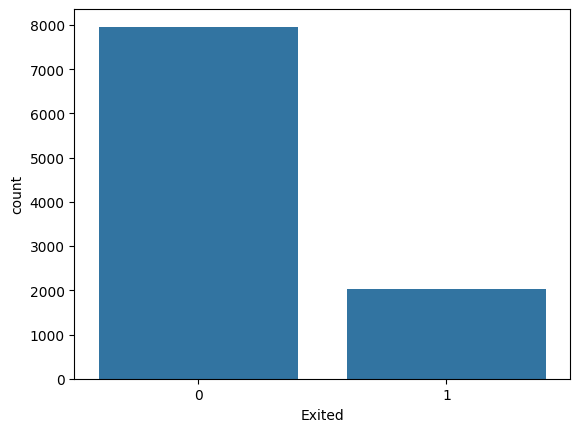

In [25]:
print(df['Exited'].value_counts())
sns.countplot(data=df, x='Exited')
plt.show()

**Segregating Independent and Dependent features**

In [26]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [27]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

**Handling Imbalanced Data With SMOTE**

In [28]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
print(y_res.value_counts())

Exited
1    7963
0    7963
Name: count, dtype: int64


**Splitting The Dataset Into The Training Set And Test Set**

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

**Feature Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(12740, 11)
(3186, 11)


### **MODEL BUILDING**
- Select and train machine learning models suited for the task, based on the problem type. This step involves dividing the data into training and testing sets and fine-tuning model parameters.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

# Plots
from sklearn import tree

In [32]:
# Function for calculating all the relevant metrics
"""Function to calculate all evaluation metrics"""
def evaluation(y_test,y_pred):
    Accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Precision = true_positive /(true_positive + false_positive)
    Recall = true_positive/(true_positive + false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    AUC = roc_auc_score(y_test, y_pred)
    return Accuracy,Precision,Recall,F1_Score,AUC

In [33]:
'''All Models'''
models = {
    1: LogisticRegression(),
    2: SGDClassifier(),
    3: GaussianNB(),
    4: DecisionTreeClassifier(),
    5: RandomForestClassifier(),
    6: GradientBoostingClassifier(),
    7: AdaBoostClassifier()
}

map_keys = list(models.keys())

In [34]:
# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
  if num == 1:
    return 'LogisticRegression'
  if num == 2:
    return 'SGDClassifier_Hinge_Loss'
  if num == 3:
    return 'NaiveBayes'
  if num == 4:
    return 'DecisionTreeClassifier'
  if num == 5:
    return 'RandomForestClassifier'
  if num == 6:
    return 'GradientBoostingClassifier'
  if num == 7:
    return 'AdaBoostClassifier'
  return ''

In [35]:
results = [];
for key_index in range(len(map_keys)):
  key = map_keys[key_index]
  try:
    # if key in [3,4,5,6,7,8]:
    model = models[key]
    print(key)
    model.fit(X_train, y_train)


    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    '''Test Accuracy'''
    Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test, AUC_Test =  evaluation(y_test, y_pred_test)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train, Precision_Train, Recall_Train, F1_Score_Train, AUC_Train =  evaluation(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test,
        'F1_Score_Test' : F1_Score_Test,
        'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train,
        'F1_Score_Train' : F1_Score_Train,
        'AUC_Train' : AUC_Train
        })

  except Exception as e:
    print(e)

1


2
3
4
5
6
7


In [36]:
results = pd.DataFrame(results)
results

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_Train
0,LogisticRegression,LogisticRegression(),0.772442,0.775873,0.779213,0.777539,0.772354,0.776845,0.773302,0.776614,0.774954,0.776822
1,SGDClassifier_Hinge_Loss,SGDClassifier(),0.765851,0.776485,0.768951,0.772700,0.765577,0.769466,0.779147,0.762170,0.770565,0.769527
2,NaiveBayes,GaussianNB(),0.786880,0.794856,0.790499,0.792672,0.786675,0.777943,0.780095,0.774588,0.777332,0.777957
3,DecisionTreeClassifier,DecisionTreeClassifier(),0.802888,0.788120,0.820268,0.803873,0.803268,1.000000,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.867859,0.868953,0.872694,0.870819,0.867831,1.000000,1.000000,1.000000,1.000000,1.000000
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.844319,0.851194,0.846013,0.848596,0.844142,0.844584,0.854186,0.836479,0.845240,0.844644
6,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.831136,0.828536,0.839851,0.834155,0.831203,0.820722,0.816588,0.821519,0.819046,0.820696


### **MODEL EVALUATION AND INTERPRETATION**

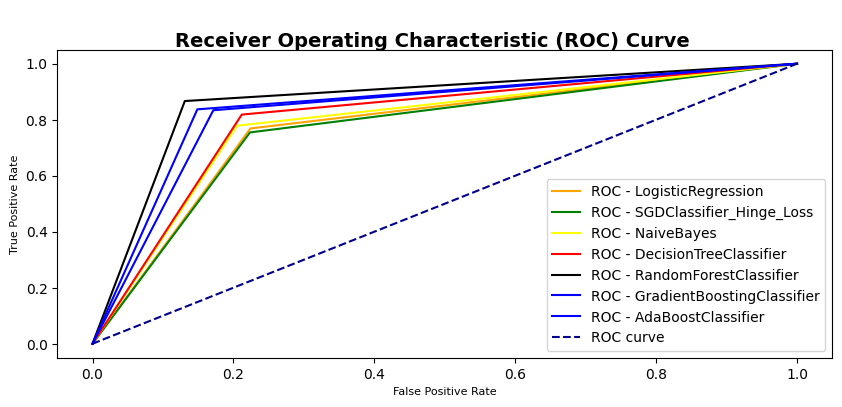

In [37]:
fpr_dict = {}
tpr_dict = {}
for i in range(len(map_keys)):

    model_pred = results['Trained Model'][i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr

plt.figure(figsize=(10,4))
plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize = 14, fontweight='bold')
plt.plot(fpr_dict[0], tpr_dict[0], color='orange', label=f"ROC - {results['Model Name'][0]}")
plt.plot(fpr_dict[1], tpr_dict[1], color='green', label=f"ROC - {results['Model Name'][1]}")
plt.plot(fpr_dict[2], tpr_dict[2], color='yellow', label=f"ROC - {results['Model Name'][2]}")
plt.plot(fpr_dict[3], tpr_dict[3], color='red', label=f"ROC - {results['Model Name'][3]}")
plt.plot(fpr_dict[4], tpr_dict[4], color='black', label=f"ROC - {results['Model Name'][4]}")
plt.plot(fpr_dict[5], tpr_dict[5], color='blue', label=f"ROC - {results['Model Name'][5]}")
plt.plot(fpr_dict[6], tpr_dict[6], color='blue', label=f"ROC - {results['Model Name'][6]}")

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve')
plt.xlabel('False Positive Rate',fontdict={'fontsize': 8})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 8})
plt.legend()
plt.show()

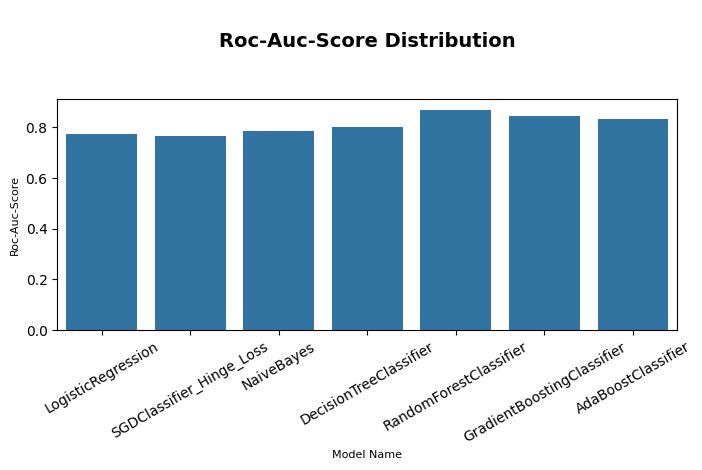

In [38]:
plt.figure(figsize=(8,3))
plt.title('\nRoc-Auc-Score Distribution\n\n', fontsize =14, fontweight='bold')
sns.barplot(data = results, x='Model Name', y='AUC_Test')
plt.xlabel('Model Name',fontdict={'fontsize': 8})
plt.ylabel('Roc-Auc-Score',fontdict={'fontsize': 8})
plt.xticks(rotation = 30)
plt.show()

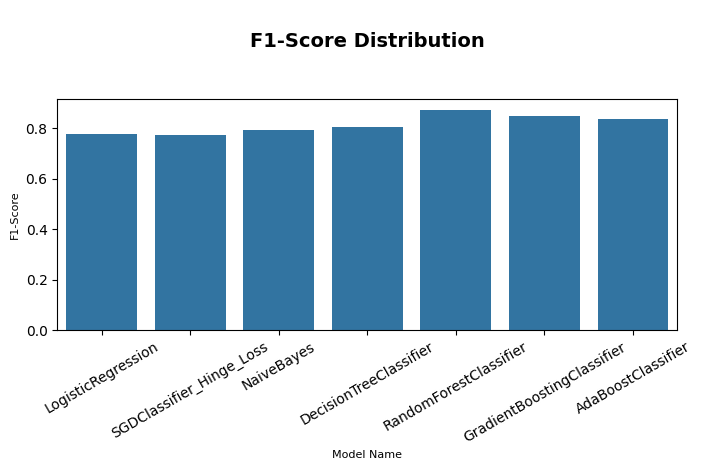

In [39]:
plt.figure(figsize=(8,3))
plt.title('\nF1-Score Distribution\n\n', fontsize = 14, fontweight='bold')
sns.barplot(data=results, x='Model Name', y='F1_Score_Test')
plt.xlabel('Model Name',fontdict={'fontsize': 8})
plt.ylabel('F1-Score',fontdict={'fontsize': 8})
plt.xticks(rotation = 30)
plt.show()

In [40]:
results.columns

Index(['Model Name', 'Trained Model', 'Accuracy_Test', 'Precision_Test',
       'Recall_Test', 'F1_Score_Test', 'AUC_Test', 'Accuracy_Train',
       'Precision_Train', 'Recall_Train', 'F1_Score_Train', 'AUC_Train'],
      dtype='object')

In [41]:
# Calculate the difference between F1 scores for all models
results['Score_Difference'] = abs(results['F1_Score_Test'] - results['F1_Score_Train'])

# Filter out models with a score difference greater than 0.1
filtered_results = results[results['Score_Difference'] <= 0.1]

# Find the index of the model with the maximum F1 test score from the filtered results
best_test_index = filtered_results['F1_Score_Test'].idxmax()

# Get the F1 scores and difference for the best model
best_model_name = filtered_results['Trained Model'][best_test_index]
best_test_score = filtered_results['F1_Score_Test'][best_test_index]
best_train_score = filtered_results['F1_Score_Train'][best_test_index]
best_score_difference = filtered_results['Score_Difference'][best_test_index]

# Display information about the best model
print(f"Best Model: {best_model_name}")
print(f"F1 Test Score: {best_test_score}")
print(f"F1 Train Score: {best_train_score}")
print(f"Score Difference: {best_score_difference}")


Best Model: GradientBoostingClassifier()
F1 Test Score: 0.8485958485958486
F1 Train Score: 0.8452399562294824
Score Difference: 0.003355892366366131


### **Saving Best Model Model and Pre-Processed dataset**

In [42]:
# import pickle

# # Save the best model using pickle
# with open('Bank_Customer_Churn_Prediction_Model.sav', 'wb') as best_model_pickle:
#     pickle.dump(best_model_name, best_model_pickle)
# # Load the pickled model
# with open('Bank_Customer_Churn_Prediction_Model.sav', 'rb') as model_pickle:
#     loaded_model = pickle.load(model_pickle)


In [43]:

import joblib
joblib.dump(best_model_name,'../model/bank_customer_churn_predict_model')
model = joblib.load('../model/bank_customer_churn_predict_model')
# model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

joblib.dump(sc, '../model/standard_scaler')
standard_scaler = joblib.load('../model/standard_scaler')

### **GUI**

In [44]:
# from tkinter import *
# from sklearn.preprocessing import StandardScaler
# import joblib

In [45]:
# def show_entry_fields():
#     p1=int(e1.get())
#     p2=int(e2.get())
#     p3=int(e3.get())
#     p4=float(e4.get())
#     p5=int(e5.get())
#     p6=int(e6.get())
#     p7=int(e7.get())
#     p8=float(e8.get())
#     p9=int(e9.get())
#     if p9 == 1:
#         Geography_Germany=1
#         Geography_Spain=0
#         Geography_France=0
#     elif p9 == 2:
#         Geography_Germany=0
#         Geography_Spain=1
#         Geography_France=0
#     elif p9 == 3:
#         Geography_Germany=0
#         Geography_Spain=0
#         Geography_France=1  
#     p10=int(e10.get())
#     model = joblib.load('bank_customer_churn_predict_model')
#     result=model.predict(sc.transform([[p1,p2,p3,p4,
#                            p5,p6,
#                            p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
#     if result == 0:
#         Label(master, text="No Exit").grid(row=31)
#     else:
#         Label(master, text="Exit").grid(row=31)
    
    
# master = Tk()
# master.title("Bank Customers Churn Prediction Using Machine Learning")


# label = Label(master, text = "Customers Churn Prediction Using ML"
#                           , bg = "black", fg = "white"). \
#                                grid(row=0,columnspan=2)


# Label(master, text="CreditScore").grid(row=1)
# Label(master, text="Age").grid(row=2)
# Label(master, text="Tenure").grid(row=3)
# Label(master, text="Balance").grid(row=4)
# Label(master, text="NumOfProducts").grid(row=5)
# Label(master, text="HasCrCard").grid(row=6)
# Label(master, text="IsActiveMember").grid(row=7)
# Label(master, text="EstimatedSalary").grid(row=8)
# Label(master, text="Geography").grid(row=9)
# Label(master,text="Gender").grid(row=10)


# e1 = Entry(master)
# e2 = Entry(master)
# e3 = Entry(master)
# e4 = Entry(master)
# e5 = Entry(master)
# e6 = Entry(master)
# e7 = Entry(master)
# e8 = Entry(master)
# e9 = Entry(master)
# e10 = Entry(master)


# e1.grid(row=1, column=1)
# e2.grid(row=2, column=1)
# e3.grid(row=3, column=1)
# e4.grid(row=4, column=1)
# e5.grid(row=5, column=1)
# e6.grid(row=6, column=1)
# e7.grid(row=7, column=1)
# e8.grid(row=8, column=1)
# e9.grid(row=9, column=1)
# e10.grid(row=10,column=1)

# Button(master, text='Predict', command=show_entry_fields).grid()

# mainloop()

# **<center>THE END</center>**